<a href="https://colab.research.google.com/github/SubaruFallout/BasicOfDigitalImageProcessing/blob/master/constructionOfMorphologicalSkeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Построение морфологического скелета** <br>
Разработать программу построения морфологического скелета изображения и восстановления изображения по морфологическому скелету для бинарных изображений и различных структурирующих элементов.

Содержание отчета: <br>
&emsp;Исходные изображения <br>
&emsp;Код программы (для Jupiter Notebook) <br>
&emsp;Результат работы программы <br>
&emsp;Срок 01.11.2022 <br>

In [42]:
# Import the necessary libraries
import cv2
import numpy as np
import matplotlib as mpl
import os
from matplotlib import pyplot as plt
%matplotlib inline

# Make global plot defaults
mpl.rcParams['image.cmap'] = 'copper'
mpl.rcParams['figure.figsize'] = [20, 10]
mpl.rcParams["image.interpolation"] = None


C:\Users\kwx1191923\AppData\Local\Temp\ipykernel_18236\3563770202.py:12: MatplotlibDeprecationWarning: Support for setting an rcParam that expects a str value to a non-str value is deprecated since 3.5 and support will be removed two minor releases later.
  mpl.rcParams["image.interpolation"] = None


In [43]:
# Skeleton construction algorithm
# Return skeletal subset
def constructSkeleton(orig_img, struct_element):
    img = orig_img.copy()
    skeleton = []

    while True:
        eroded_img = cv2.erode(img, struct_element)
        if cv2.countNonZero(eroded_img) == 0:
            skeleton.append(img)
            break

        opened_img = cv2.dilate(eroded_img, struct_element)
        skeleton.append(cv2.subtract(img, opened_img))
        img = eroded_img.copy()

    return skeleton


In [44]:
# Restore original image from skeleton
# Return restored image
def restoreFromSkeleton(skeleton, struct_element):
    restored_img = np.zeros(skeleton[0].shape, np.uint8)
    n = len(skeleton)
    n -= 1

    while True:
        restored_img = cv2.bitwise_or(restored_img, skeleton[n])
        if n == 0:
            break

        restored_img = cv2.dilate(restored_img, struct_element)
        n -= 1

    return restored_img


In [45]:
# Make skeleton for every image
# Restore image from skeleton
# Show results
def run(files, struct_element):
    # Show struct element
    plt.figure(figsize=(1, 1))
    plt.title("Struct element", fontsize=10)
    plt.imshow(struct_element, vmin=0, vmax=1)
    plt.axis("off")
    plt.show()

    for file in files:
        img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        ret, img = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

        skeleton = constructSkeleton(img, struct_element)
        recovered_img = restoreFromSkeleton(skeleton, struct_element)

        # Merge skeleton in one array
        merged_skeleton = np.zeros(img.shape, np.uint8)
        for skeleton_part in skeleton:
            merged_skeleton = cv2.bitwise_or(merged_skeleton, skeleton_part)

        # Check if correctness of recovery
        recovered_status = None
        if np.array_equal(img, recovered_img):
            recovered_status = "Recovered successfully"
        else:
            recovered_status = "Recovered with mistakes"

        # Show res
        out = plt.figure().subplot_mosaic(
            """
            ACC
            BCC
            """
        )

        out['A'].set_title("Original image")
        out['A'].axis("off")
        out['A'].imshow(img)

        out['B'].set_title(recovered_status)
        out['B'].axis("off")
        out['B'].imshow(recovered_img)

        out['C'].set_title("Its skelet")
        out['C'].axis("off")
        out['C'].imshow(merged_skeleton)

        plt.show()


**Starting point**

In [46]:
# Get image names
directory = "binary_images"
files = []

for filename in os.listdir(directory):
    files.append(os.path.join(directory, filename))


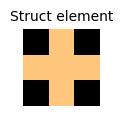

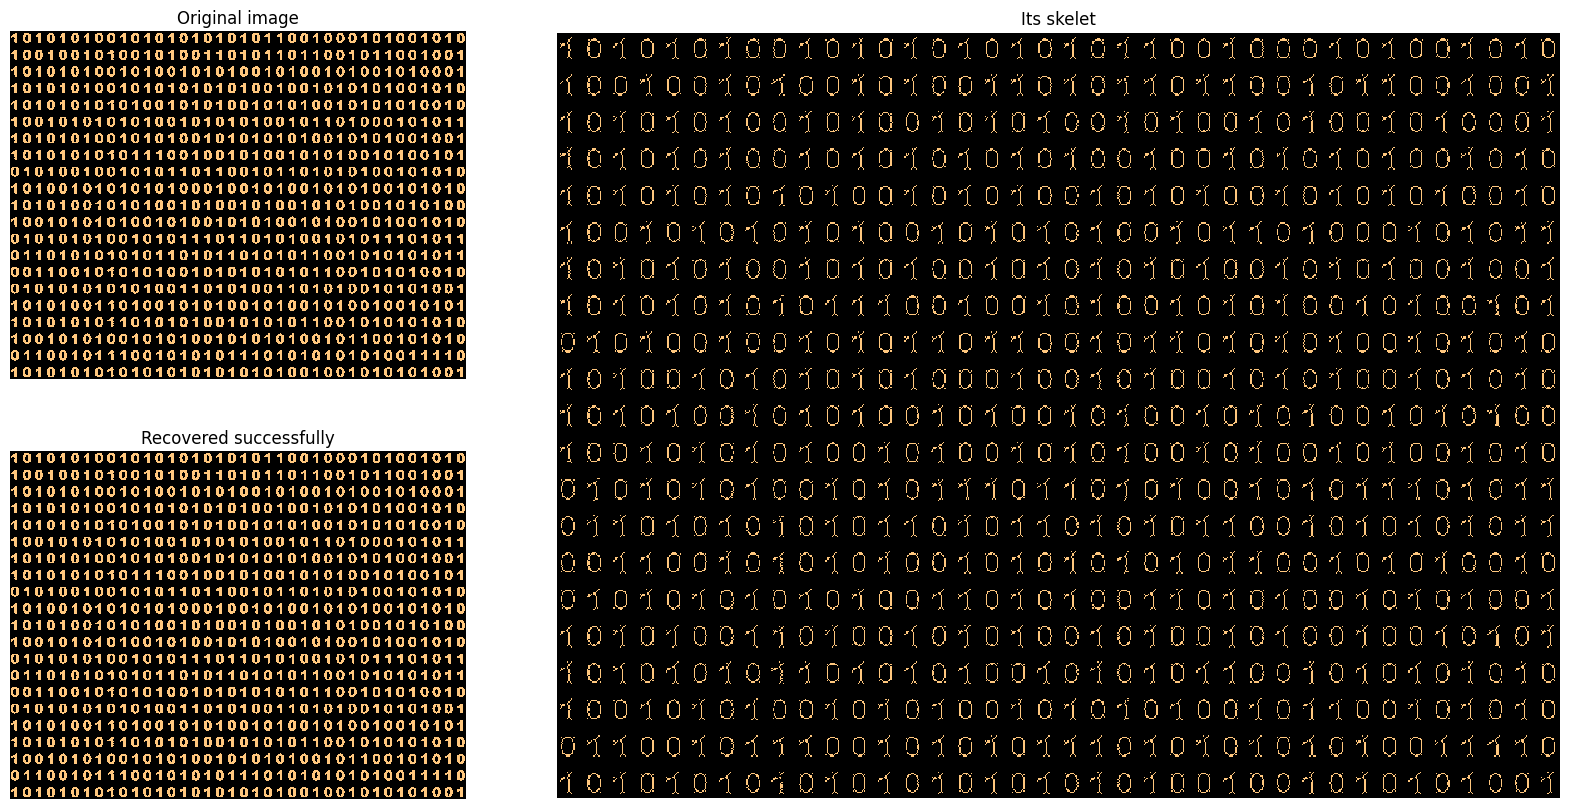

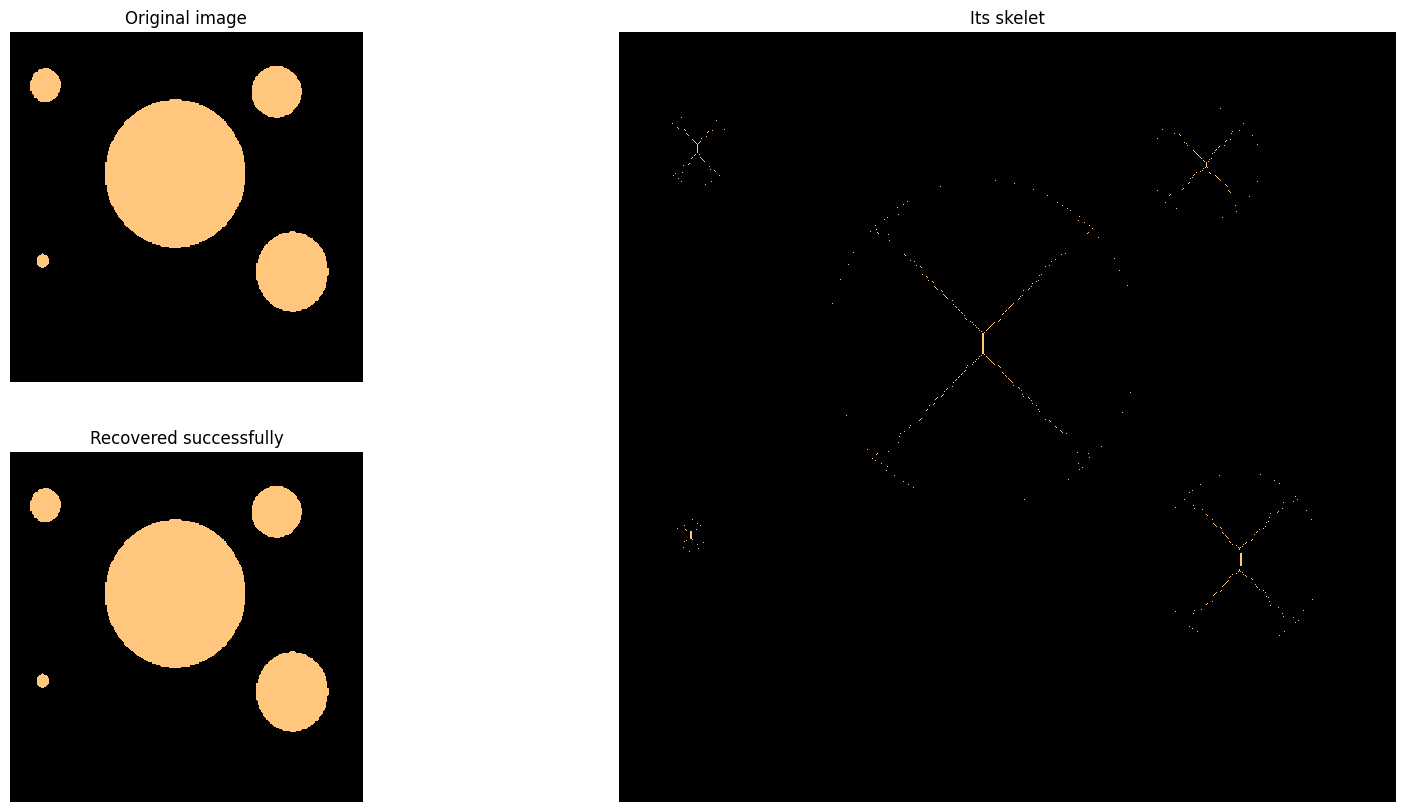

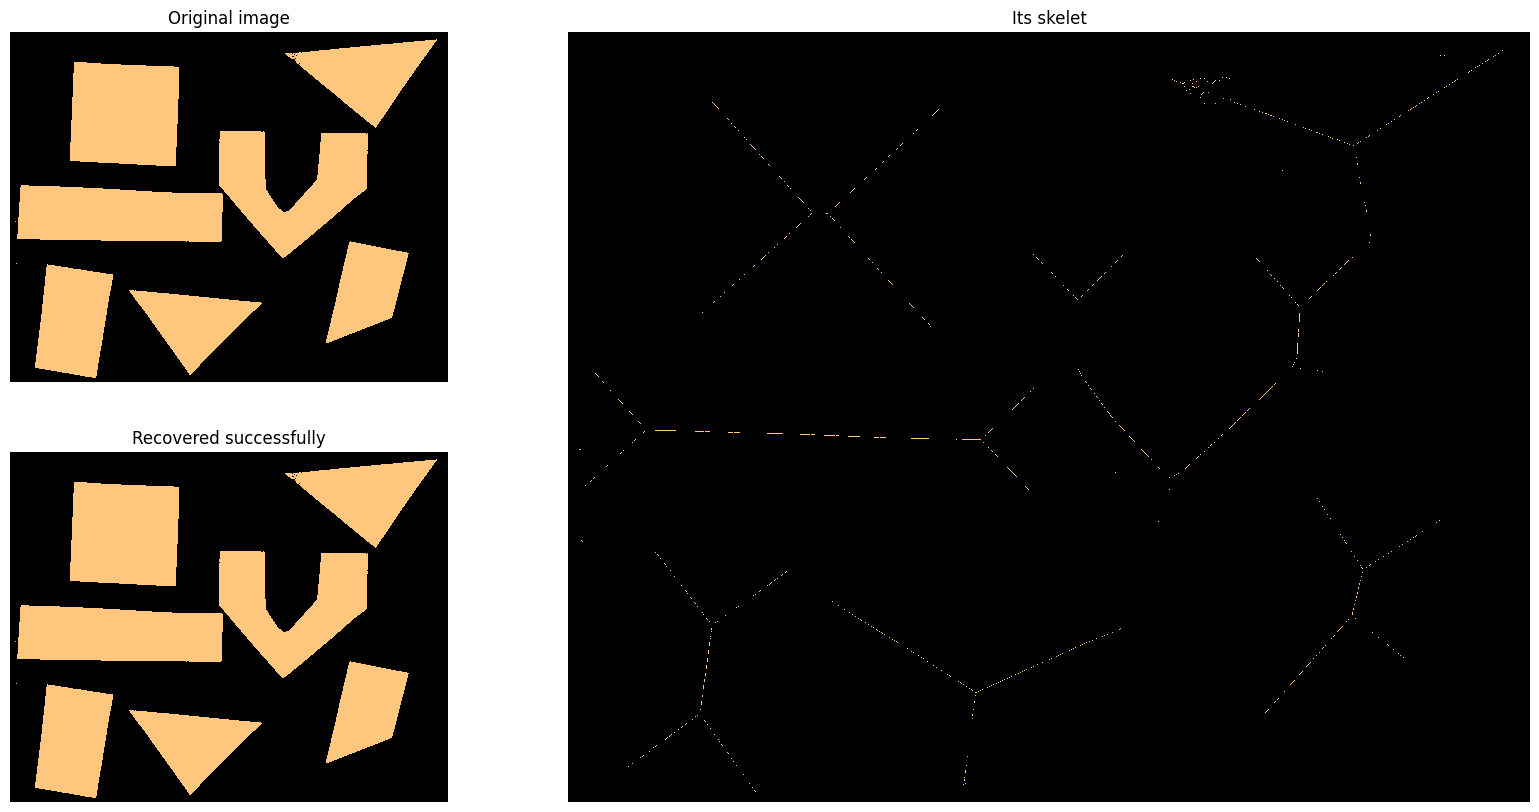

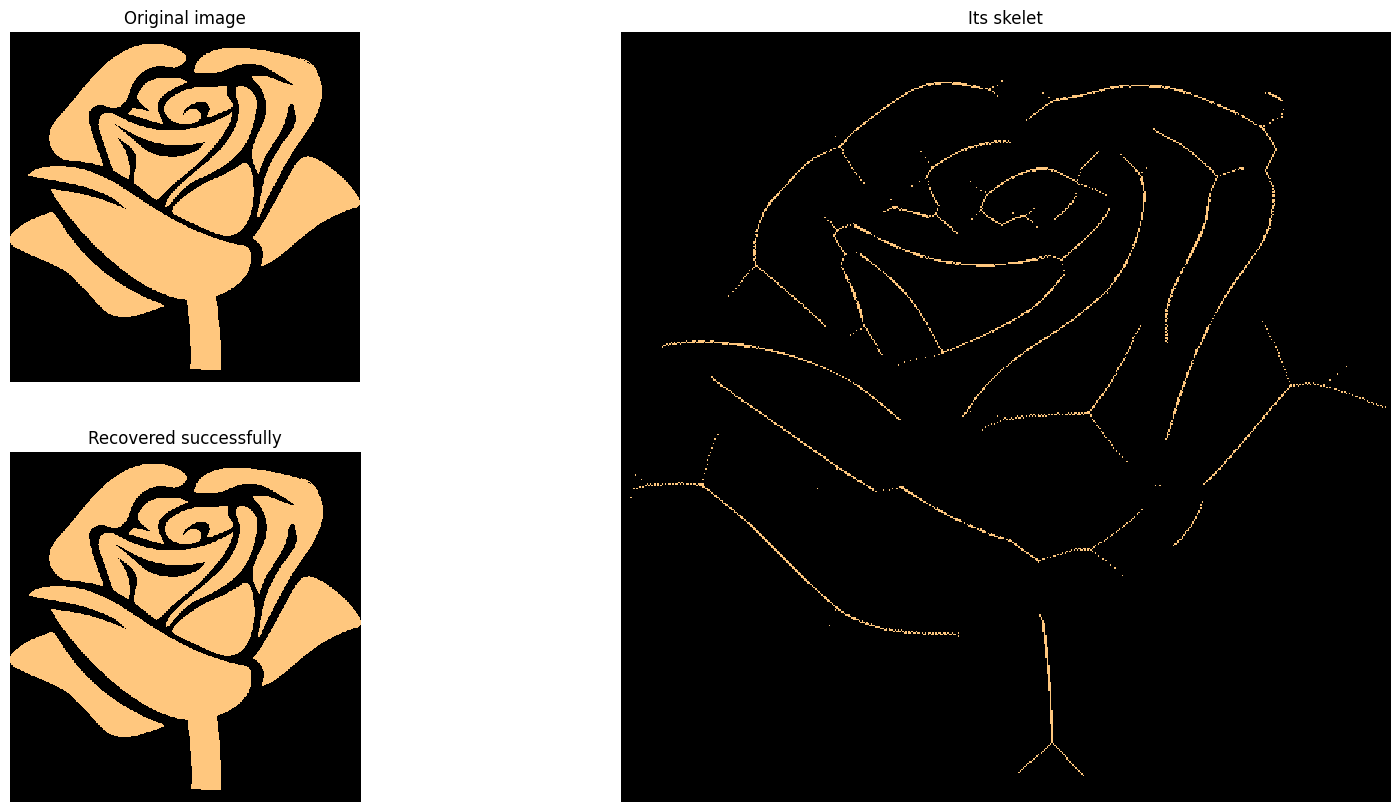

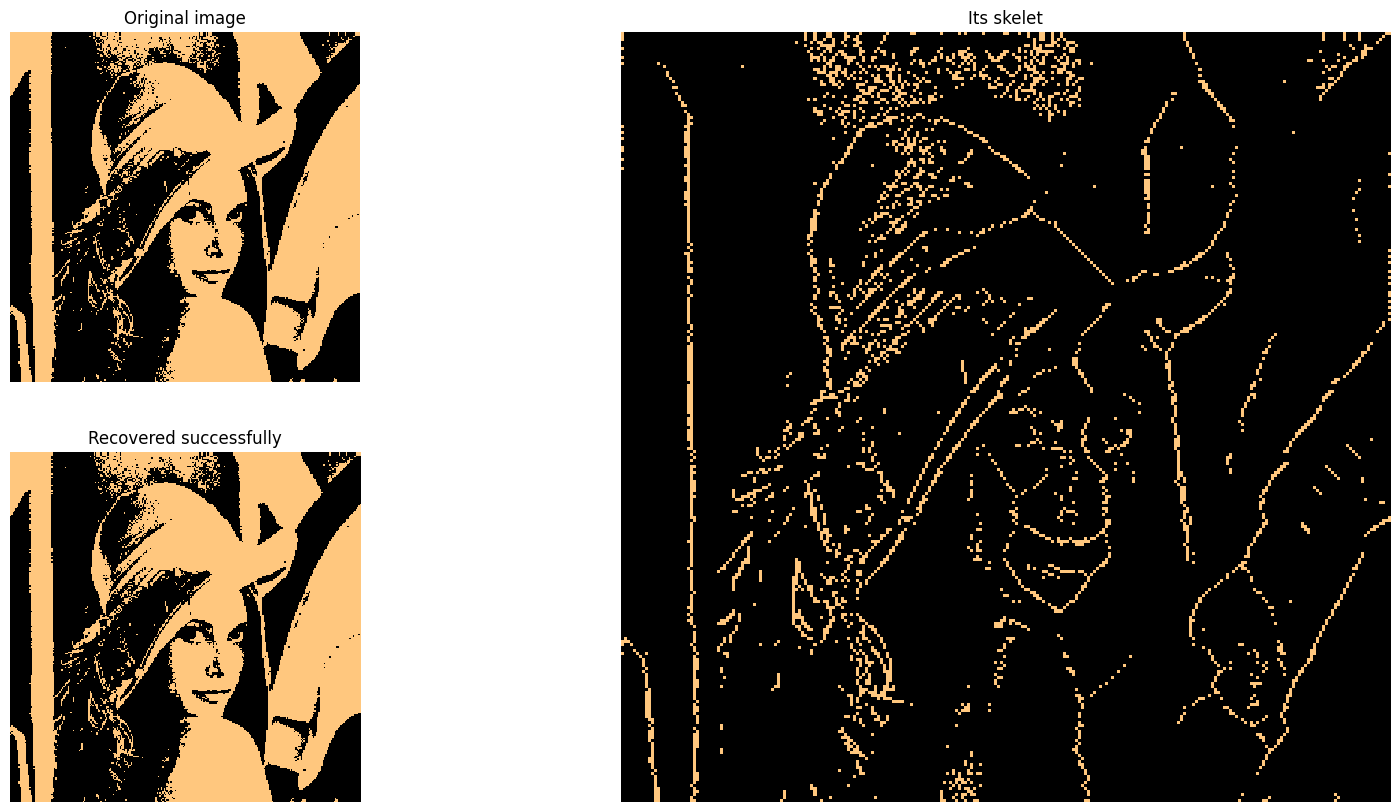

In [47]:
struct_element = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

run(files, struct_element)


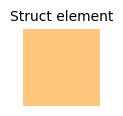

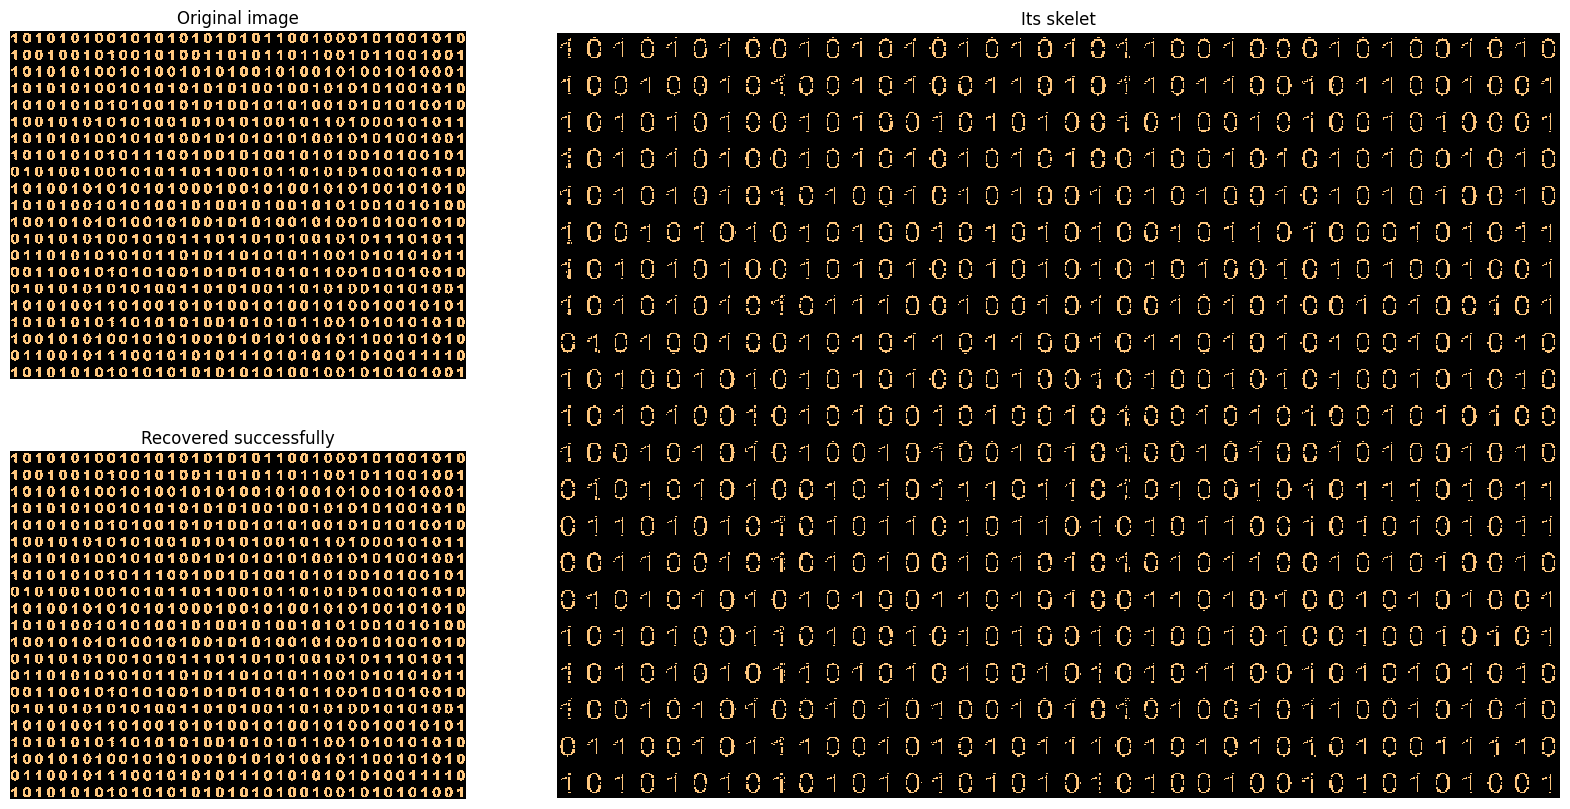

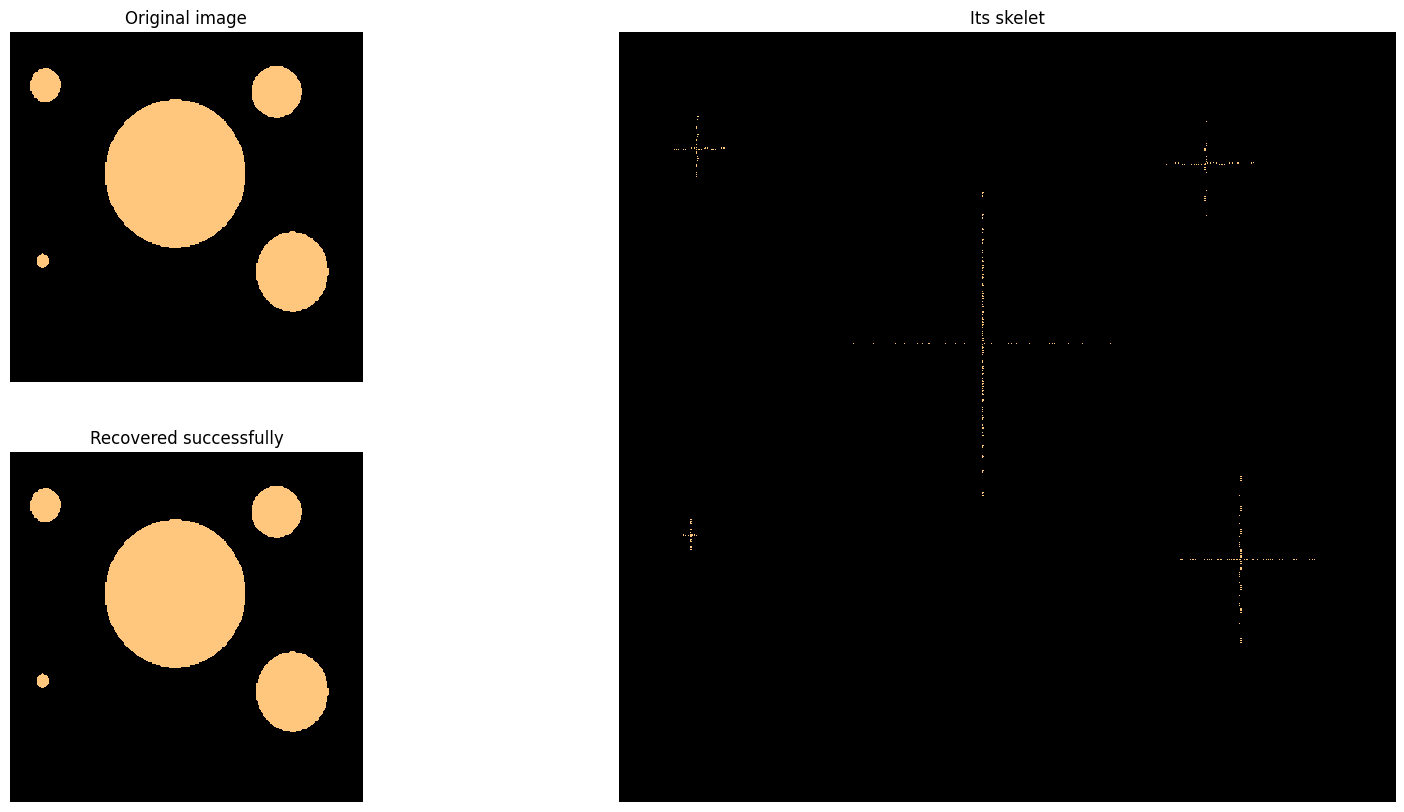

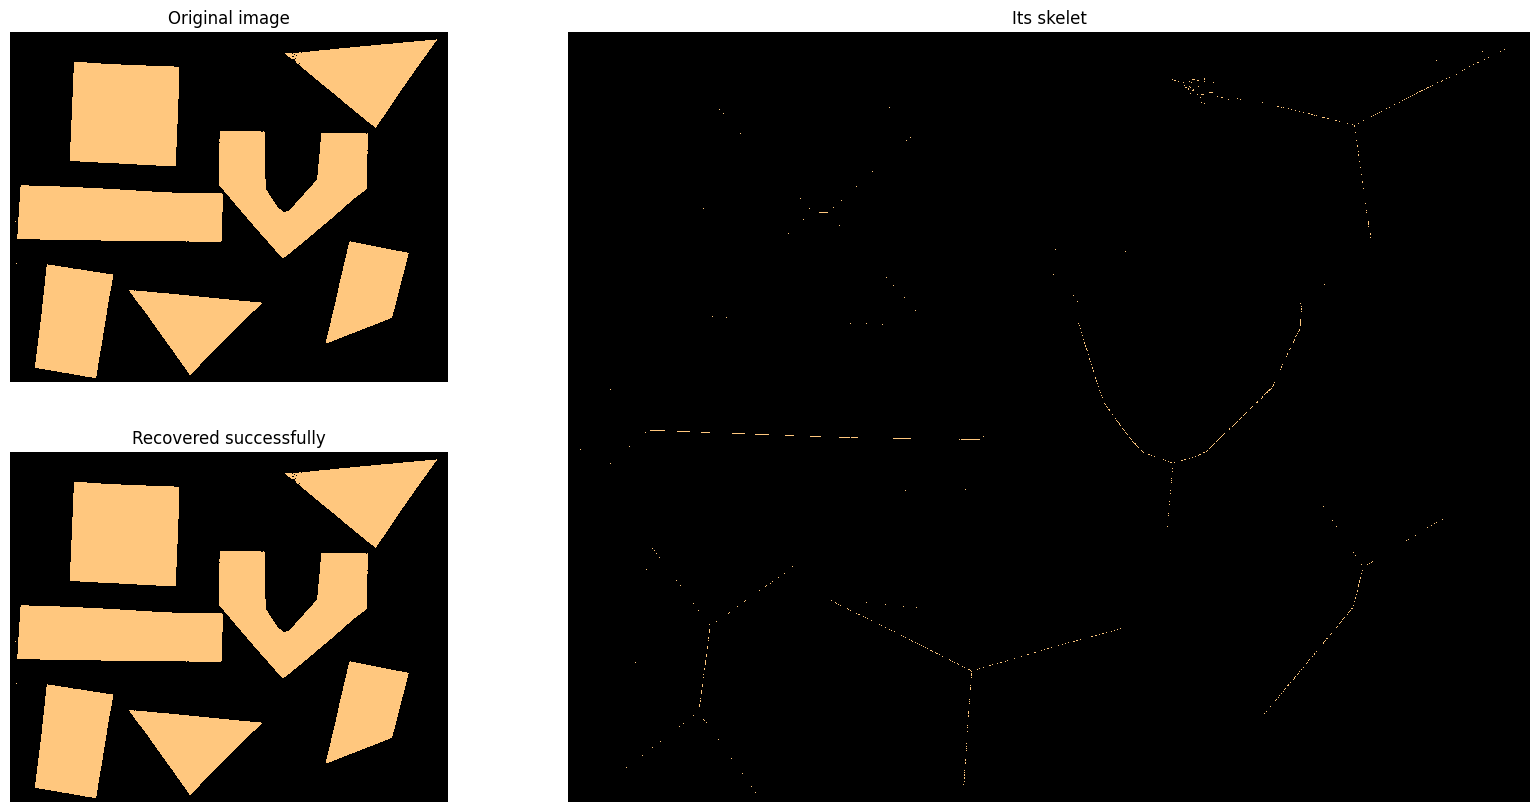

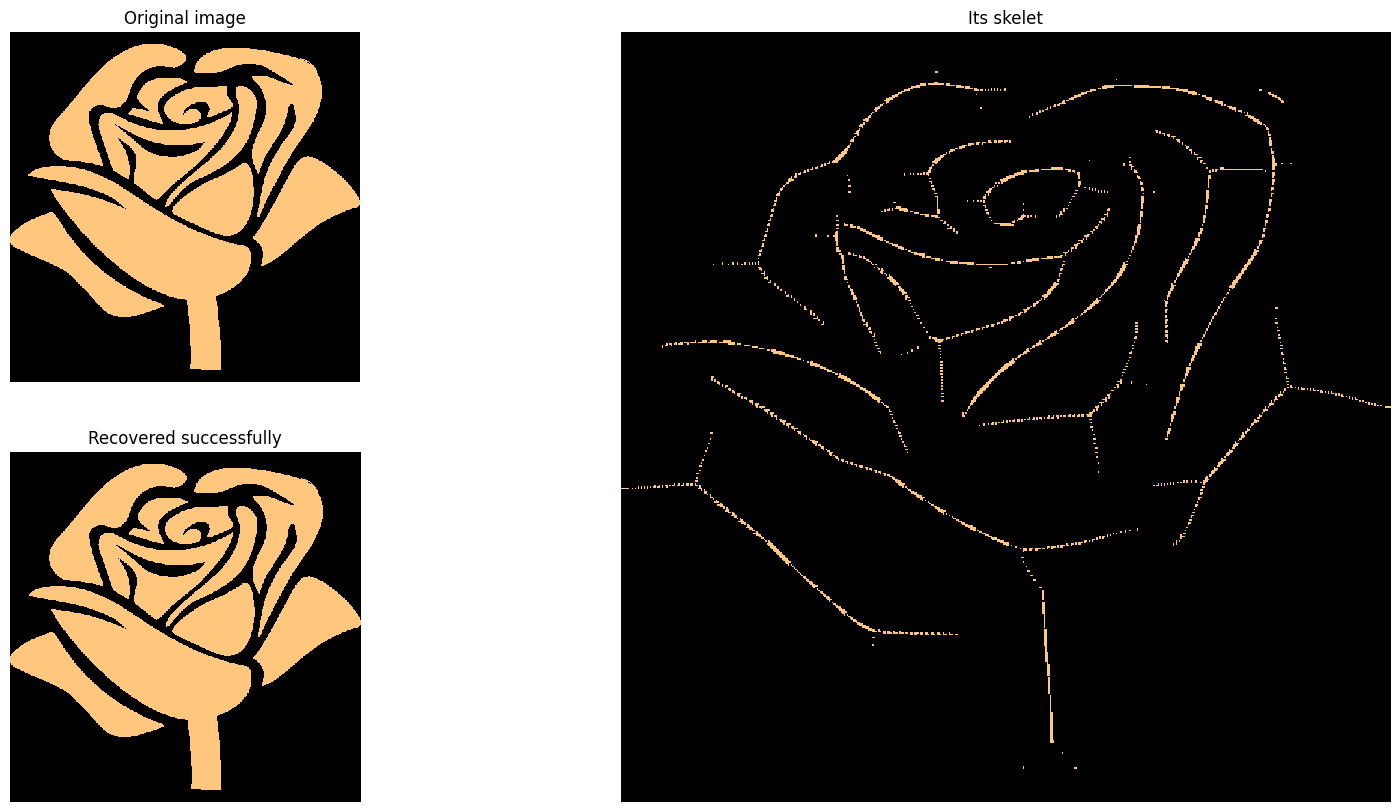

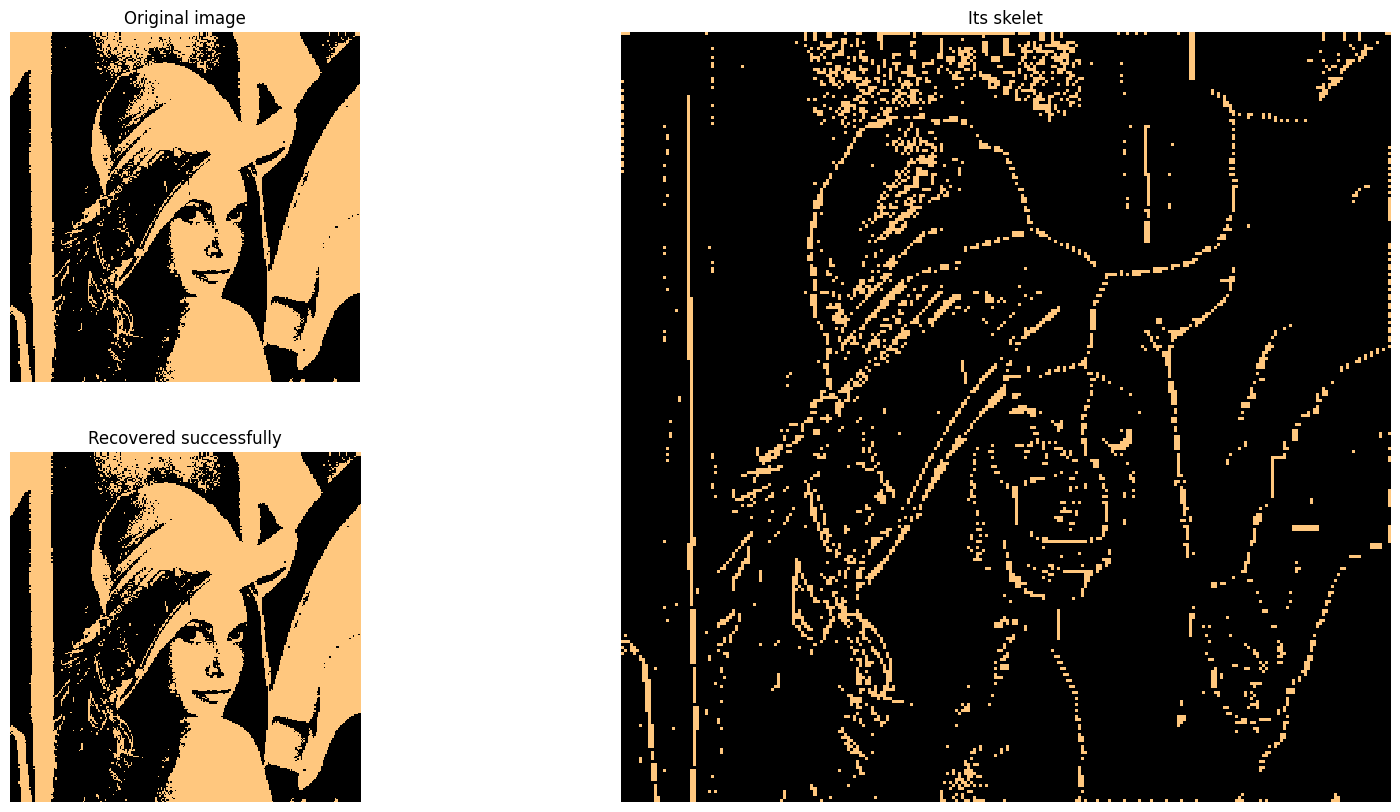

In [48]:
struct_element = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

run(files, struct_element)


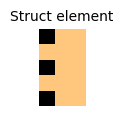

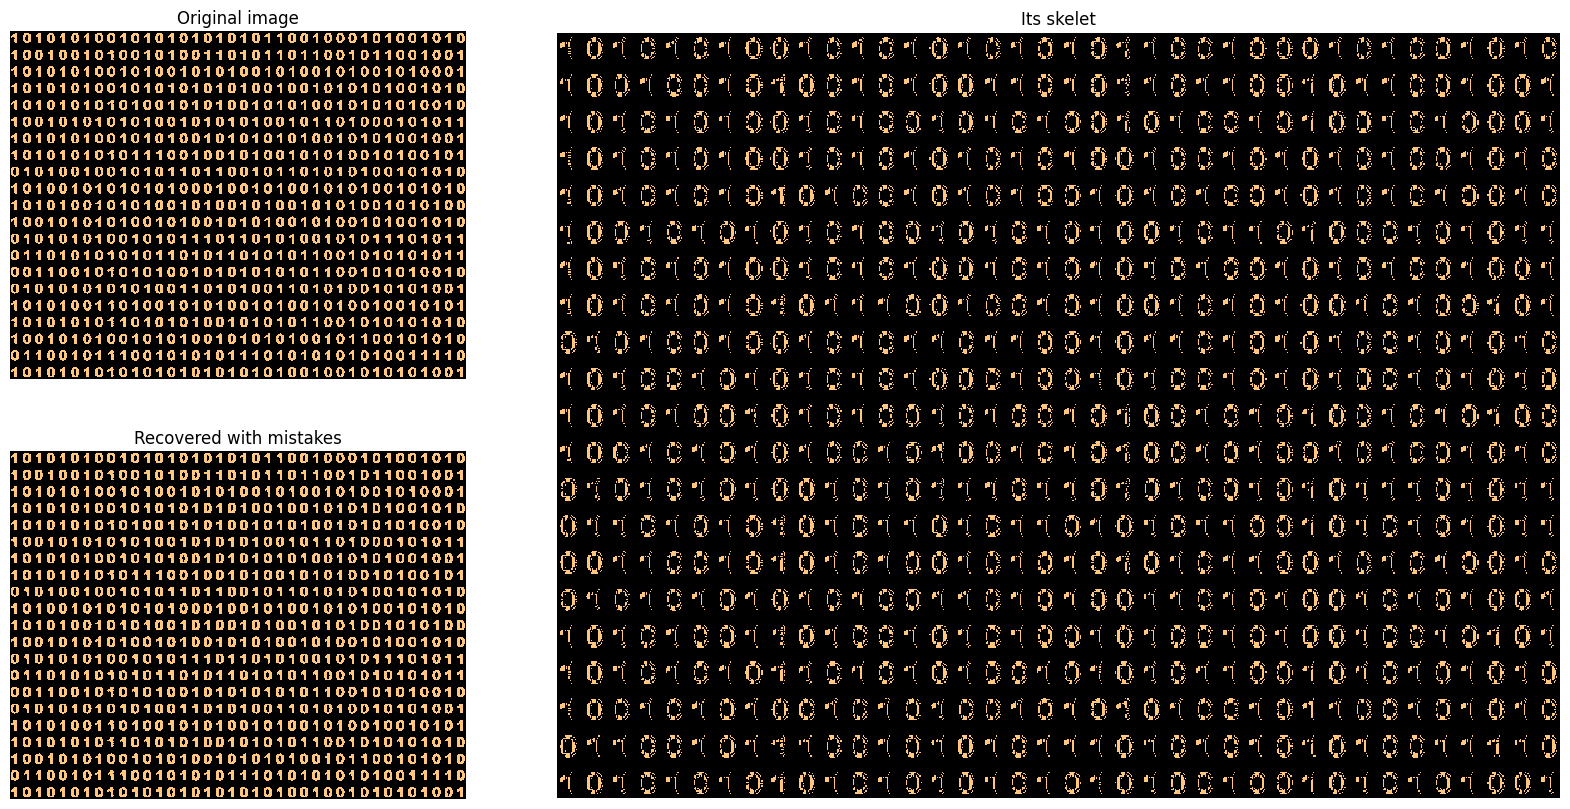

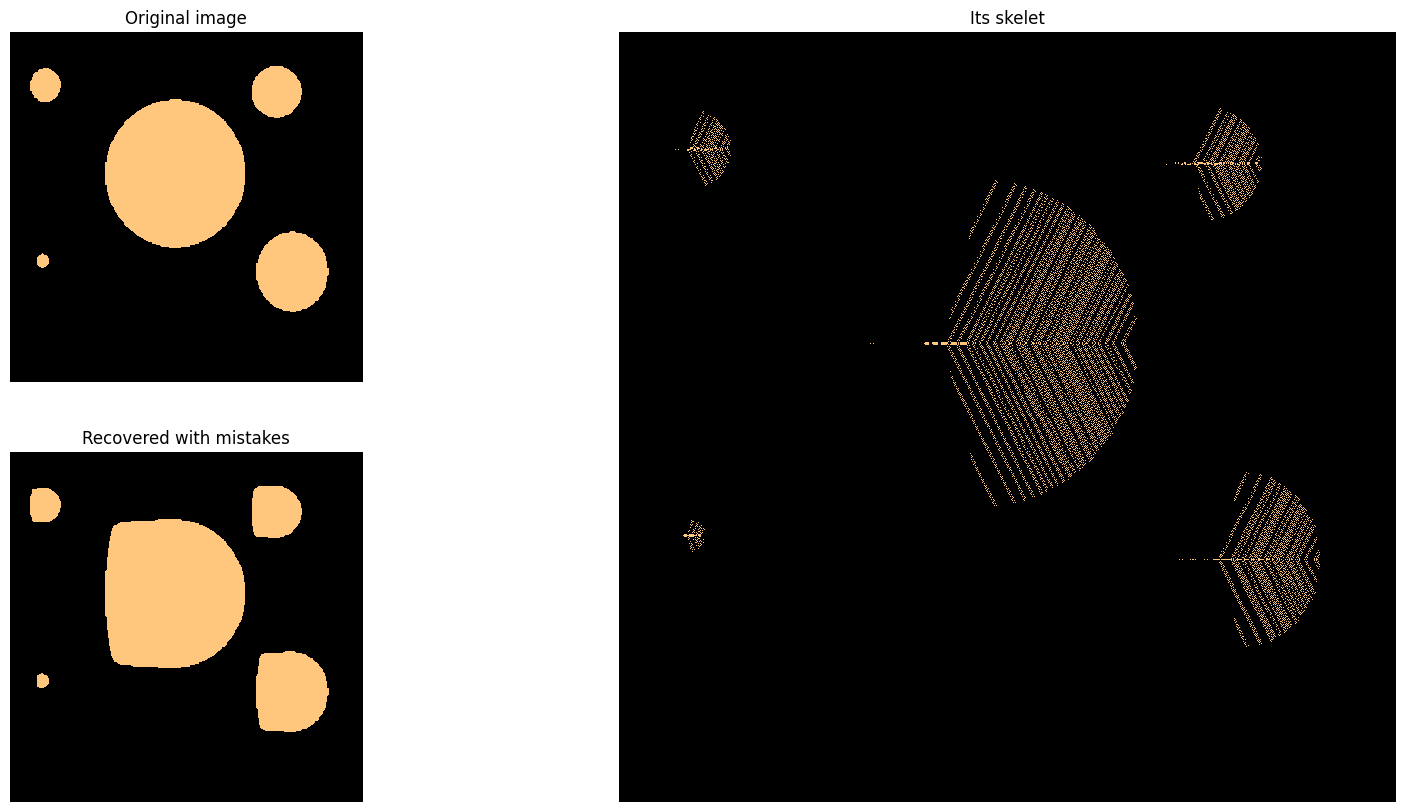

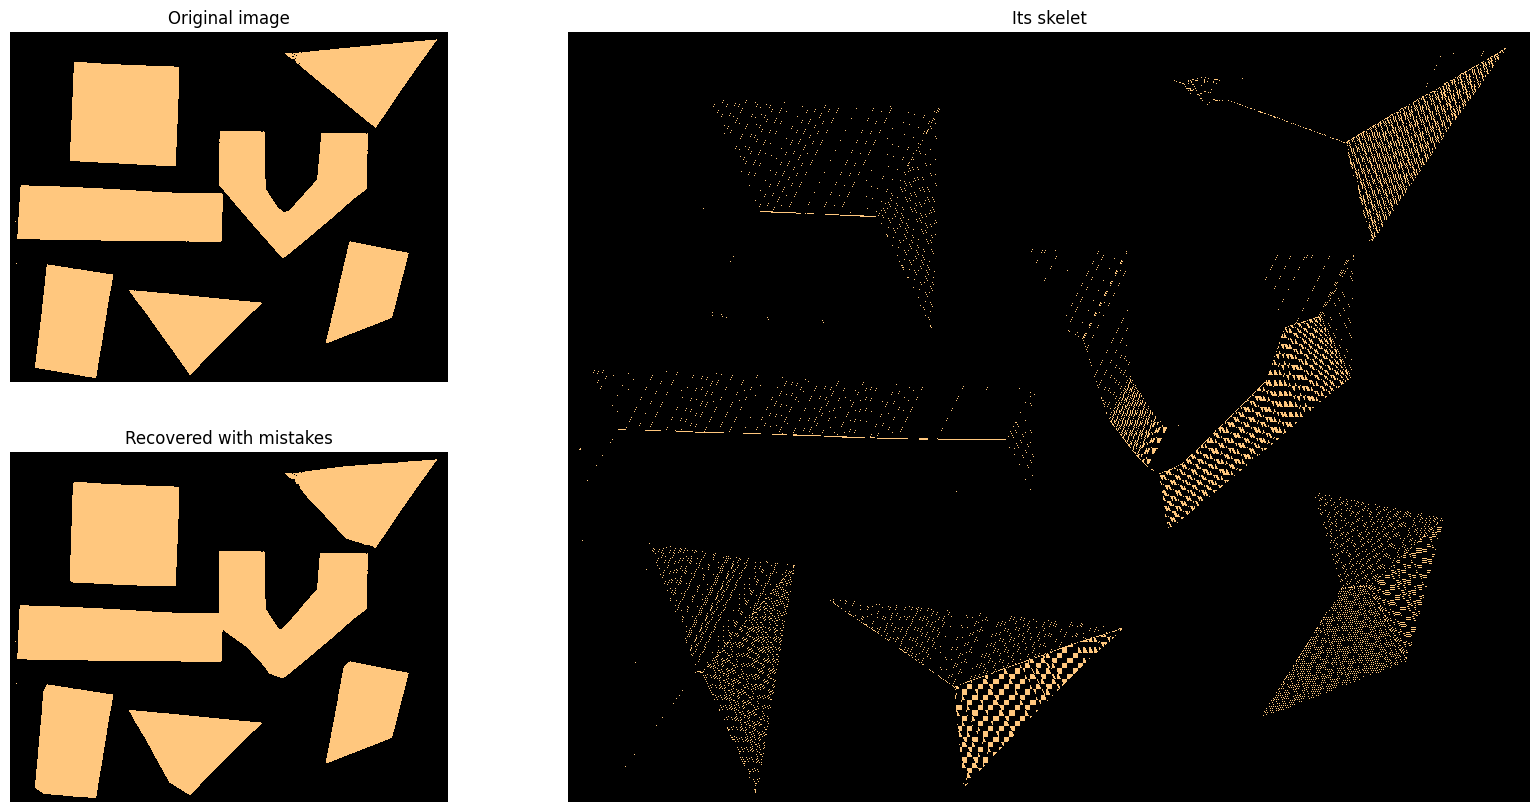

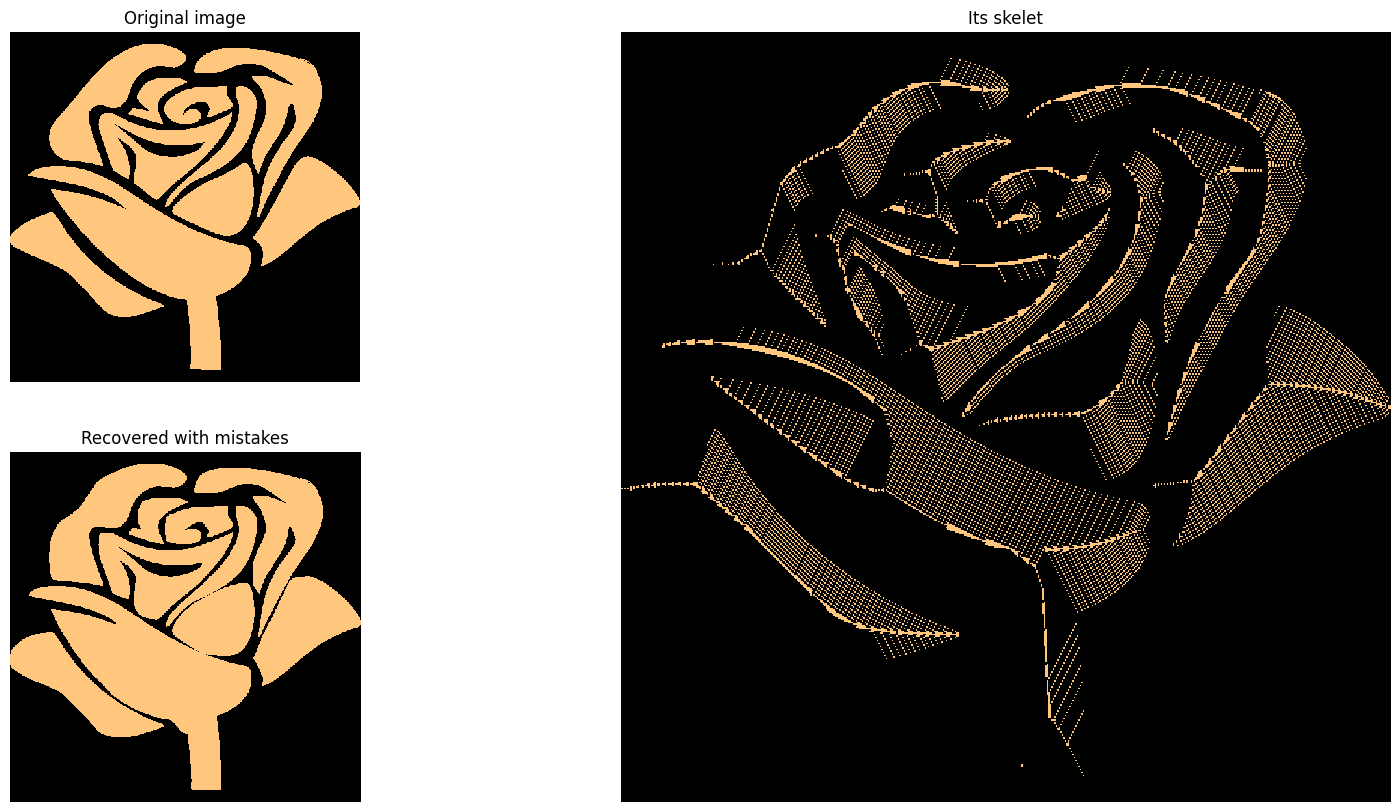

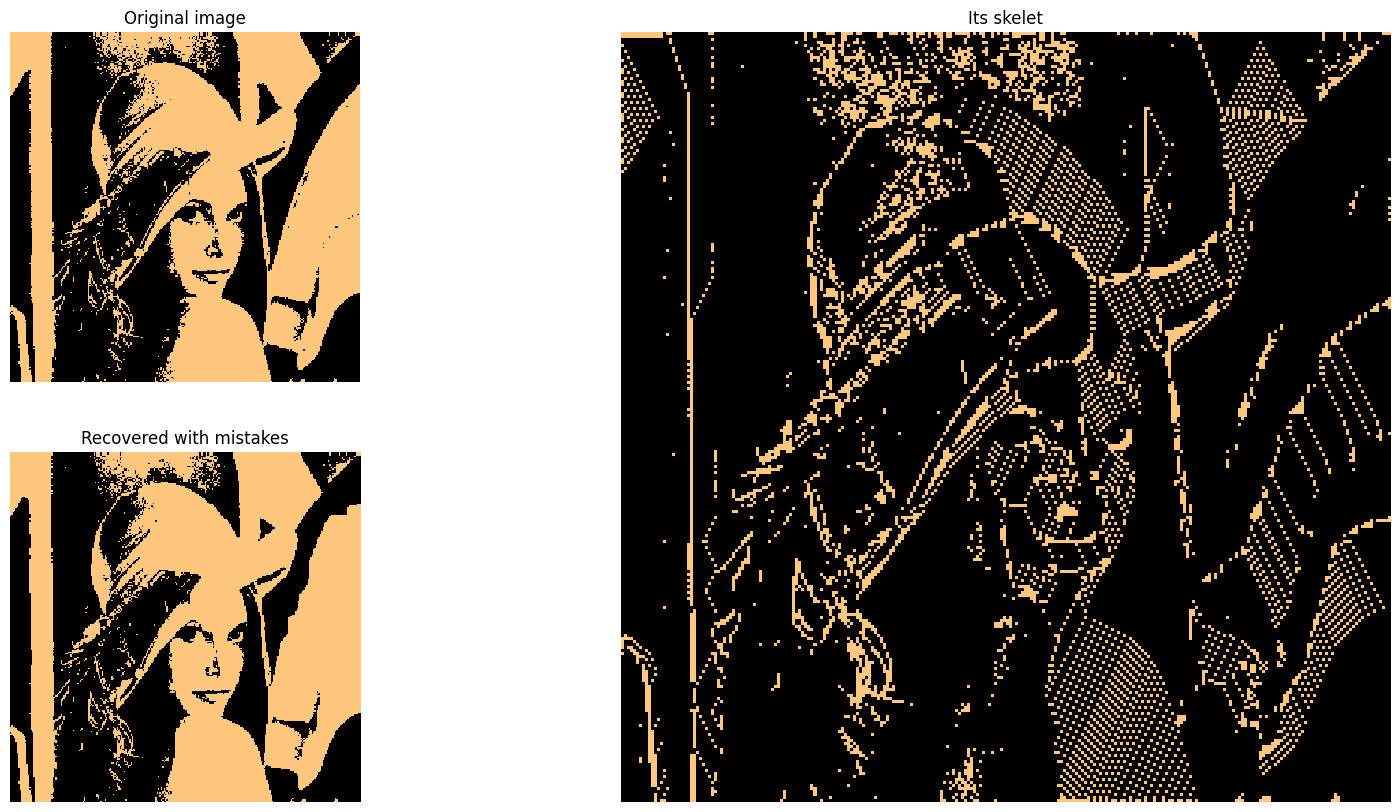

In [49]:
# Check non symmetric struct element
struct_element = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 5))
struct_element[0, 0] = 0
struct_element[2, 0] = 0
struct_element[4, 0] = 0

run(files, struct_element)
